In [1]:
#inviting guest to the party
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import re

from scipy import stats
from scipy.stats import skew
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

import sklearn.model_selection as ms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import norm



pd.set_option('display.max_columns',99)
pd.set_option('display.max_rows',300)

In [2]:
#import datasets
test_dataset = pd.read_csv('./test_dataset.csv')
train_dataset = pd.read_csv('./train_dataset.csv')

#add identifier for test and train data set
train_dataset['dataset'] = 'train'
test_dataset['dataset'] = 'test'

#get shape of train and test data set
print(f'train data set is {train_dataset.shape}')
print(f'test data set is {test_dataset.shape}')
merged_data = pd.concat([train_dataset, test_dataset], axis=0)
print(f'merged data set is {merged_data.shape}')

train data set is (91589, 51)
test data set is (10177, 51)
merged data set is (101766, 51)


In [3]:
#make a copy for data exploration
df = merged_data.copy(deep=True)


# EDA

### Exploration the target variable

In [4]:
#function to summarize feature
def summarize_feature(dataframe,feature):
    feature_summary = {'values':dataframe[feature].value_counts().index.tolist(),
                     'counts':dataframe[feature].value_counts().values.tolist(),
                     'frequency': dataframe[feature].value_counts(normalize = True).values.tolist()}
    feature_summary = pd.DataFrame(feature_summary)
    return feature_summary


In [5]:
print('\n'+'*'*10 +'readmitted original'+'*'*10)
print(summarize_feature(df, 'readmitted'))

#replace target variable with numerical value
df['readmitted'] = df['readmitted'].replace('<30', '1')
df['readmitted'] = df['readmitted'].replace('>30', '0')
df['readmitted'] = df['readmitted'].replace('NO', '0')

print('\n'+'*'*10 +'readmitted cleaned'+'*'*10)
print(summarize_feature(df, 'readmitted'))



**********readmitted original**********
  values  counts  frequency
0     NO   54864   0.539119
1    >30   35545   0.349282
2    <30   11357   0.111599

**********readmitted cleaned**********
  values  counts  frequency
0      0   90409   0.888401
1      1   11357   0.111599


### feature examination

In [6]:
#converting all categorical numbers to str

df[['encounter_id','patient_nbr', 'admission_type_id','discharge_disposition_id', 'admission_source_id',]] = df[['encounter_id','patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',]].astype(str)
      

### features one by one

#### encounter_id and patient_nbr are left alone for now

In [7]:
print('\n'+'*'*10 +'race original'+'*'*10)
print(summarize_feature(df, 'race'))

#replace ? with unknown
df.race = df.race.replace({'?':'unknown'})

print('\n'+'*'*10 +'race cleaned'+'*'*10)
print(summarize_feature(df, 'race'))



**********race original**********
            values  counts  frequency
0        Caucasian   76099   0.747784
1  AfricanAmerican   19210   0.188766
2                ?    2273   0.022336
3         Hispanic    2037   0.020017
4            Other    1506   0.014799
5            Asian     641   0.006299

**********race cleaned**********
            values  counts  frequency
0        Caucasian   76099   0.747784
1  AfricanAmerican   19210   0.188766
2          unknown    2273   0.022336
3         Hispanic    2037   0.020017
4            Other    1506   0.014799
5            Asian     641   0.006299


In [8]:
print('\n'+'*'*10 +'gender original'+'*'*10)
print(summarize_feature(df, 'gender'))

#only 3 unknown/invalid, drop rows
df = df[df.gender != 'Unknown/Invalid']

print('\n'+'*'*10 +'gender cleaned'+'*'*10)
print(summarize_feature(df, 'gender'))



**********gender original**********
            values  counts  frequency
0           Female   54708   0.537586
1             Male   47055   0.462384
2  Unknown/Invalid       3   0.000029

**********gender cleaned**********
   values  counts  frequency
0  Female   54708   0.537602
1    Male   47055   0.462398


In [9]:
print('\n'+'*'*10 +'age original'+'*'*10)
print(summarize_feature(df, 'age'))

#convert age feature
dict_age = {'[60-70)': '60-70', 
            '[40-50)':'40-50', 
            '[80-90)':'80-90',
               '[70-80)':'70-80',
               '[50-60)':'50-60',
               '[20-30)':'20-30',
               '[90-100)':'90-100',
               '[30-40)':'30-40',
               '[0-10)':'0-10',
               '[10-20)':'10-20'}
df.age.replace(dict_age, inplace=True)

print('\n'+'*'*10 +'age converted'+'*'*10)
print(summarize_feature(df, 'age'))



**********age original**********
     values  counts  frequency
0   [70-80)   26066   0.256144
1   [60-70)   22482   0.220925
2   [50-60)   17256   0.169570
3   [80-90)   17197   0.168991
4   [40-50)    9685   0.095172
5   [30-40)    3775   0.037096
6  [90-100)    2793   0.027446
7   [20-30)    1657   0.016283
8   [10-20)     691   0.006790
9    [0-10)     161   0.001582

**********age converted**********
   values  counts  frequency
0   70-80   26066   0.256144
1   60-70   22482   0.220925
2   50-60   17256   0.169570
3   80-90   17197   0.168991
4   40-50    9685   0.095172
5   30-40    3775   0.037096
6  90-100    2793   0.027446
7   20-30    1657   0.016283
8   10-20     691   0.006790
9    0-10     161   0.001582


In [10]:
print('\n'+'*'*10 +'weight original'+'*'*10)
print(summarize_feature(df, 'weight'))

#missing a lot of data, drop column
df = df.drop(['weight'], axis = 1)

print('\n'+'*'*10 +'weight cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'weight'))
except:
    print('Feature does not exist')



**********weight original**********
      values  counts  frequency
0          ?   98566   0.968584
1   [75-100)    1336   0.013129
2    [50-75)     897   0.008815
3  [100-125)     625   0.006142
4  [125-150)     145   0.001425
5    [25-50)      97   0.000953
6     [0-25)      48   0.000472
7  [150-175)      35   0.000344
8  [175-200)      11   0.000108
9       >200       3   0.000029

**********weight cleaned**********
Feature does not exist


In [11]:
print('\n'+'*'*10 +'admission_type_id original'+'*'*10)
print(summarize_feature(df, 'admission_type_id'))

#urgent is used to replace 1,2, and 7 from IDs_mappings
dict_admission_type = {'1': 'urgent', 
            '2':'urgent', 
            '3':'elective',
               '4':'newborn',
               '5':'na',
               '6':'na',
               '7':'urgent',
               '8':'na'}
df.admission_type_id.replace(dict_admission_type, inplace=True)

print('\n'+'*'*10 +'admission_type_id cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'admission_type_id'))
except:
    print('Feature does not exist')



**********admission_type_id original**********
  values  counts  frequency
0      1   53988   0.530527
1      3   18868   0.185411
2      2   18480   0.181598
3      6    5291   0.051993
4      5    4785   0.047021
5      8     320   0.003145
6      7      21   0.000206
7      4      10   0.000098

**********admission_type_id cleaned**********
     values  counts  frequency
0    urgent   72489   0.712332
1  elective   18868   0.185411
2        na   10396   0.102159
3   newborn      10   0.000098


In [12]:
print('\n'+'*'*10 +'discharge_disposition_id original'+'*'*10)
print(summarize_feature(df, 'discharge_disposition_id'))

#11, 13, 14, 19, 20, 21 are patients who are expired so no re-admission possible, drop these rows
expired_list = ['11','13','14','19','20','21']
df = df[~df.discharge_disposition_id.isin(expired_list)]

dict_discharge_disposition_id = {
    '1':'home', 
    '2':'hospital', 
    '3':'assisted',
    '4':'hospital',
    '5':'assisted',
    '6':'home',
    '7':'na',
    '8':'assisted',
    '9':'hospital',
    '10':'hospital',
    '12':'hospital',
    '15':'hospital',
    '16':'hospital',
    '17':'hospital',
    '18':'na',
    '22':'hospital',
    '23':'hospital',
    '24':'assisted',
    '25':'na',
    '26':'na',
    '30':'assisted',
    '27':'assisted',
    '28':'hospital',
    '29':'hospital',}
#amongst the discharge ID, they are broadly categorized into home, assisted (nursing home, homecare aid), another hospital, or NA
df.discharge_disposition_id.replace(dict_discharge_disposition_id, inplace=True)

print('\n'+'*'*10 +'discharge_disposition_id cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'discharge_disposition_id'))
except:
    print('Feature does not exist')



**********discharge_disposition_id original**********
   values  counts  frequency
0       1   60232   0.591885
1       3   13954   0.137123
2       6   12902   0.126785
3      18    3691   0.036271
4       2    2128   0.020911
5      22    1992   0.019575
6      11    1642   0.016136
7       5    1184   0.011635
8      25     989   0.009719
9       4     815   0.008009
10      7     623   0.006122
11     23     412   0.004049
12     13     399   0.003921
13     14     372   0.003656
14     28     139   0.001366
15      8     108   0.001061
16     15      63   0.000619
17     24      48   0.000472
18      9      21   0.000206
19     17      14   0.000138
20     16      11   0.000108
21     19       8   0.000079
22     10       6   0.000059
23     27       5   0.000049
24     12       3   0.000029
25     20       2   0.000020

**********discharge_disposition_id cleaned**********
     values  counts  frequency
0      home   73134   0.736199
1  assisted   15299   0.154006
2  hospital    

In [13]:
print('\n'+'*'*10 +'admission_source_id original'+'*'*10)
print(summarize_feature(df, 'admission_source_id'))

dict_admission_source_id = {
    '1':'referral', 
    '2':'referral', 
    '3':'referral',
    '4':'transfer',
    '5':'transfer',
    '6':'transfer',
    '7':'urgent',
    '8':'other',
    '9':'other',
    '10':'transfer',
    '11':'birth',
    '12':'birth',
    '13':'birth',
    '14':'birth',
    '15':'birth',
    '17':'other',
    '18':'transfer',
    '19':'transfer',
    '20':'other',
    '21':'other',
    '22':'transfer',
    '23':'birth',
    '24':'birth',
    '25':'transfer',
    '26':'transfer'}

#amongst the admission_source_id , they are broadly categorized
df.admission_source_id.replace(dict_admission_source_id, inplace=True)

print('\n'+'*'*10 +'admission_source_id cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'admission_source_id'))
except:
    print('Feature does not exist')




**********admission_source_id original**********
   values  counts  frequency
0       7   55848   0.562190
1       1   29167   0.293608
2      17    6570   0.066137
3       4    3118   0.031387
4       6    2239   0.022539
5       2    1081   0.010882
6       5     806   0.008114
7       3     185   0.001862
8      20     159   0.001601
9       9     125   0.001258
10      8      15   0.000151
11     22      12   0.000121
12     10       8   0.000081
13     11       2   0.000020
14     25       2   0.000020
15     14       2   0.000020
16     13       1   0.000010

**********admission_source_id cleaned**********
     values  counts  frequency
0    urgent   55848   0.562190
1  referral   30433   0.306352
2     other    6869   0.069146
3  transfer    6185   0.062261
4     birth       5   0.000050


In [14]:
summarize_feature(df, 'payer_code')
#missing a lot of data, drop column
df = df.drop(['payer_code'], axis = 1)


In [15]:
summarize_feature(df, 'medical_specialty')
#missing a lot of data, drop column
df = df.drop(['medical_specialty'], axis = 1)


In [16]:
print('\n'+'*'*10 +'diag_1 original'+'*'*10)
print(summarize_feature(df, 'diag_1'))

def code_to_category(icd9code):
    try:
        icd9code = float(icd9code)
        if (icd9code >= 390 and icd9code < 460) or icd9code == 785:
            return 'circulatory'
        if (icd9code >= 460 and icd9code < 520) or icd9code == 786:
            return 'respiratory'
        if (icd9code >= 520 and icd9code < 580) or icd9code == 787:
            return 'digestive'
        if (icd9code >= 250 and icd9code < 251):
            return 'diabetes'
        if (icd9code >= 800 and icd9code < 1000):
            return 'injury'
        if (icd9code >= 710 and icd9code < 740):
            return 'musculoskeletal'
        if (icd9code >= 580 and icd9code < 630) or icd9code == 788:
            return 'genitourinary'
        if (icd9code >= 140 and icd9code < 240) or icd9code == 780 or icd9code == 781 or icd9code == 784 or (icd9code >= 790 and icd9code < 800):
            return 'neoplasms'
        if (icd9code >= 240 and icd9code < 250) or (icd9code >= 251 and icd9code < 280) or (icd9code >= 680 and icd9code < 710) or icd9code == 782:
            return 'neoplasms'
        else:
            return 'other'
    except:
        if (icd9code == '?'):
            return '?'
        return 'other'
    
    
#convert the diag to categorical based on icd codes
df.diag_1 = [code_to_category(x) for x in df['diag_1']]
# df.diag_2 = [code_to_category(x) for x in df['diag_2']]
# df.diag_3 = [code_to_category(x) for x in df['diag_3']]

df = df.drop(['diag_2','diag_3'], axis = 1)

print('\n'+'*'*10 +'diag_1 cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'diag_1'))
except:
    print('Feature does not exist')



**********diag_1 original**********
     values  counts  frequency
0       428    6663   0.067073
1       414    6549   0.065925
2       786    4015   0.040417
3       410    3448   0.034709
4       486    3383   0.034055
5       427    2720   0.027381
6       491    2240   0.022549
7       715    2147   0.021613
8       682    2029   0.020425
9       780    2004   0.020173
10      996    1937   0.019499
11      434    1930   0.019428
12      276    1839   0.018512
13    250.8    1655   0.016660
14      599    1564   0.015744
15       38    1497   0.015069
16      584    1450   0.014596
17      V57    1200   0.012080
18    250.6    1177   0.011848
19      820    1069   0.010761
20      493    1054   0.010610
21      577    1045   0.010519
22      435    1014   0.010207
23      562     985   0.009915
24      574     961   0.009674
25      518     947   0.009533
26      296     895   0.009009
27      560     861   0.008667
28    250.7     854   0.008597
29   250.13     849   0.008546
30

In [17]:
summarize_feature(df, 'max_glu_serum')

print('\n'+'*'*10 +'max_glu_serum original'+'*'*10)
print(summarize_feature(df, 'max_glu_serum'))

dict_max_glu_seru = {'None': '0', 
                     'Norm':'1', 
                     '>300':'3',
                    '>200':'2'}
df.max_glu_serum.replace(dict_max_glu_seru, inplace=True)
#replace max_glu_serum with numerical values

print('\n'+'*'*10 +'max_glu_serum cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'max_glu_serum'))
except:
    print('Feature does not exist')



**********max_glu_serum original**********
  values  counts  frequency
0   None   94188   0.948138
1   Norm    2545   0.025619
2   >200    1419   0.014284
3   >300    1188   0.011959

**********max_glu_serum cleaned**********
  values  counts  frequency
0      0   94188   0.948138
1      1    2545   0.025619
2      2    1419   0.014284
3      3    1188   0.011959


In [18]:
summarize_feature(df,'A1Cresult')


summarize_feature(df, 'A1Cresult')

print('\n'+'*'*10 +'A1Cresult original'+'*'*10)
print(summarize_feature(df, 'A1Cresult'))

dict_A1Cresult = {'None': '0', 
                     'Norm':'1', 
                     '>7':'2',
                    '>8':'3'}
df.A1Cresult.replace(dict_A1Cresult, inplace=True)
#replace A1C with numerical values

print('\n'+'*'*10 +'A1Cresult cleaned'+'*'*10)
try:
    print(summarize_feature(df, 'A1Cresult'))
except:
    print('Feature does not exist')



**********A1Cresult original**********
  values  counts  frequency
0   None   82506   0.830542
1     >8    8137   0.081911
2   Norm    4922   0.049547
3     >7    3775   0.038001

**********A1Cresult cleaned**********
  values  counts  frequency
0      0   82506   0.830542
1      3    8137   0.081911
2      1    4922   0.049547
3      2    3775   0.038001


In [19]:
#here we want to note any changes in the dosage of medicine.
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['med_dosage_change'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['med_dosage_change'] = df['med_dosage_change'] + df[colname]
    del df[colname]
#here 0 means no changes in doses of medicine, >0 means there is increase or decrease in dosage


In [20]:
df['number_of_medicine'] = 0
for col in keys:
    df['number_of_medicine'] = df['number_of_medicine'] + df[col].apply(lambda x: 0 if (x == 'No') else 1)
#new column to account for the total number of medicine patient is taking


In [21]:
drug_df = df.loc[:, 'metformin':'diabetesMed']
for drug in list(drug_df):
    print('\n'+drug)
    print('-'*50)
    n = summarize_feature(drug_df,  drug)
    print(n)
#values in drug list is has similar values, make 1 library


metformin
--------------------------------------------------
   values  counts  frequency
0      No   79497   0.800252
1  Steady   18206   0.183270
2      Up    1063   0.010701
3    Down     574   0.005778

repaglinide
--------------------------------------------------
   values  counts  frequency
0      No   97822   0.984719
1  Steady    1368   0.013771
2      Up     107   0.001077
3    Down      43   0.000433

nateglinide
--------------------------------------------------
   values  counts  frequency
0      No   98651   0.993064
1  Steady     654   0.006583
2      Up      24   0.000242
3    Down      11   0.000111

chlorpropamide
--------------------------------------------------
   values  counts  frequency
0      No   99255   0.999144
1  Steady      78   0.000785
2      Up       6   0.000060
3    Down       1   0.000010

glimepiride
--------------------------------------------------
   values  counts  frequency
0      No   94218   0.948440
1  Steady    4609   0.046396
2      Up   

In [22]:
dict_drug = {'No': '0', 
            'Down':'1', 
            'Steady':'2',
            'Up':'3',
             'Ch':'1',
             'Yes':'1'
            }
#replace drug text with numerical value


In [23]:
drug_df = df.loc[:, 'metformin':'diabetesMed']

for drug in drug_df:
    drug_df[drug] = drug_df[drug].map(dict_drug)



In [24]:
df.loc[:, 'metformin':'diabetesMed'] = drug_df

In [25]:
#these 2 drugs were all 'no', so drop them
df = df.drop(['examide', 'citoglipton'], axis = 1)


### Missing Values

In [26]:
df = df.replace('?', np.nan)
#saw in dataset missing value or unknown has '?', will replace with nan
df.isnull().sum().sort_values(ascending=False).head(10)
#list col with missing values
#diag_2 and diag_3 missing are okay, since diag_1 is present, replace missing with value in diag_1

#drop missing diag_1
df = df.dropna(subset=['diag_1'])

df.isnull().sum().sort_values(ascending=False).head(10)


number_of_medicine    0
num_medications       0
repaglinide           0
metformin             0
A1Cresult             0
max_glu_serum         0
number_diagnoses      0
diag_1                0
number_inpatient      0
number_emergency      0
dtype: int64

In [27]:
df.shape

(99320, 46)

In [28]:
df_dummified = df.copy(deep=True)

In [29]:
df_dummified.select_dtypes(include=['object']).columns.tolist()


['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'dataset']

In [30]:
df_dummified = pd.get_dummies(df_dummified, columns=['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1'])

In [31]:
df_dummified.shape

(99320, 79)

In [32]:
num_cols = df_dummified.select_dtypes(include=['int64']).columns.tolist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2463e2e8>,
      dtype=object)

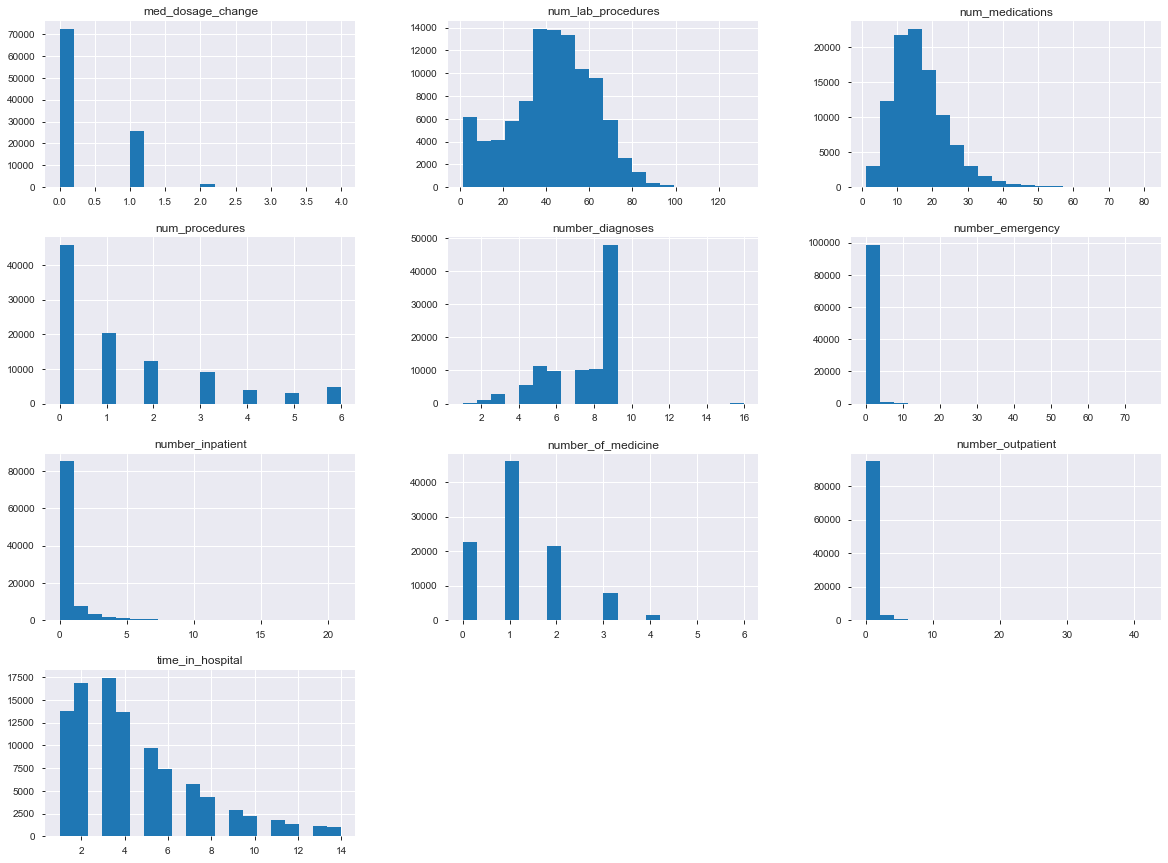

In [33]:
df_dummified[num_cols].hist(bins=20, figsize=(20,15))

In [34]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_cols
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_cols:
    skewval = df_dummified[i].skew()
    skew_before.append(skewval)
    
    kurtval = df_dummified[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df_dummified[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df_dummified[df_dummified[i] == 0])/len(df_dummified) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df_dummified[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df_dummified[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df_dummified[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df_dummified[df_dummified[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df_dummified[df_dummified[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df_dummified[df_dummified[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,time_in_hospital,1.141746,0.887137,2.968590,No,NA,1.141746,0.887137,2.968590
1,num_lab_procedures,-0.241597,-0.252845,19.610046,No,NA,-0.241597,-0.252845,19.610046
2,num_procedures,1.322015,0.876153,1.702873,No,NA,1.322015,0.876153,1.702873
3,num_medications,1.335412,3.532965,8.095274,No,NA,1.335412,3.532965,8.095274
4,number_outpatient,8.838990,149.021609,1.265265,Yes,log1p,2.736732,7.826344,0.429326
5,number_emergency,22.848383,1183.089951,0.937811,Yes,log1p,3.666775,16.333404,0.315507
6,number_inpatient,3.633785,20.915687,1.260469,Yes,log1p,1.455312,1.422280,0.509914
7,number_diagnoses,-0.861530,-0.121992,1.941042,No,NA,-0.861530,-0.121992,1.941042
8,med_dosage_change,1.427581,1.445214,0.487885,No,NA,1.427581,1.445214,0.487885
9,number_of_medicine,0.673919,0.273694,0.922387,No,NA,0.673919,0.273694,0.922387


In [35]:
# log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

 Title: number_emergency
 Before Log Transformartion

 mu = 0.20 and sigma = 0.94



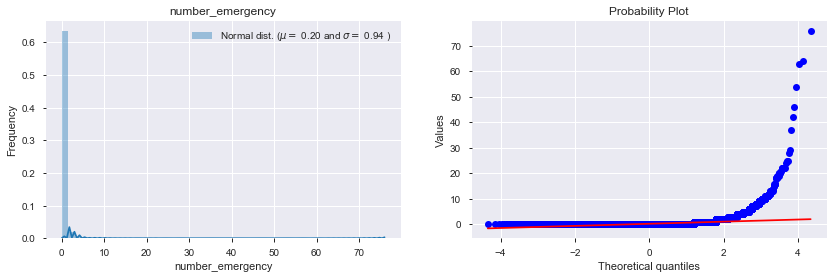

After Log Transformation

 mu = 0.10 and sigma = 0.32



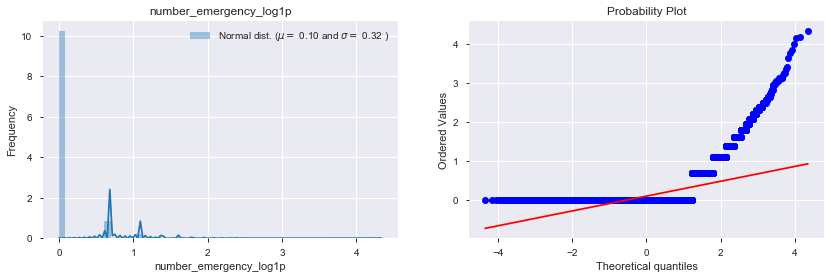

 Title: number_inpatient
 Before Log Transformartion

 mu = 0.63 and sigma = 1.26



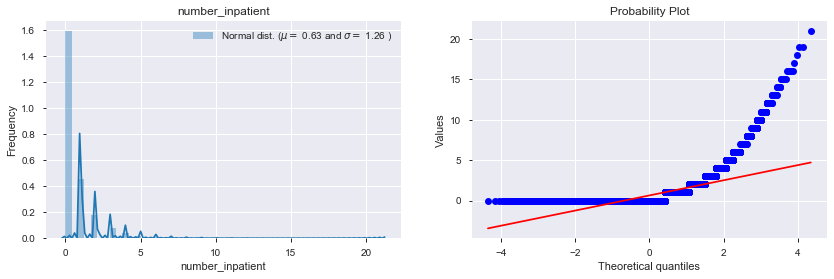

After Log Transformation

 mu = 0.32 and sigma = 0.51



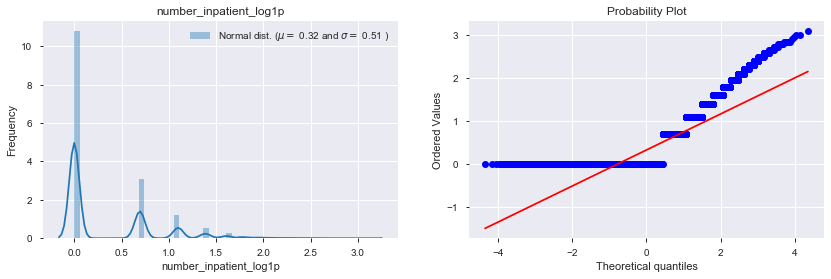

 Title: number_outpatient
 Before Log Transformartion

 mu = 0.37 and sigma = 1.27



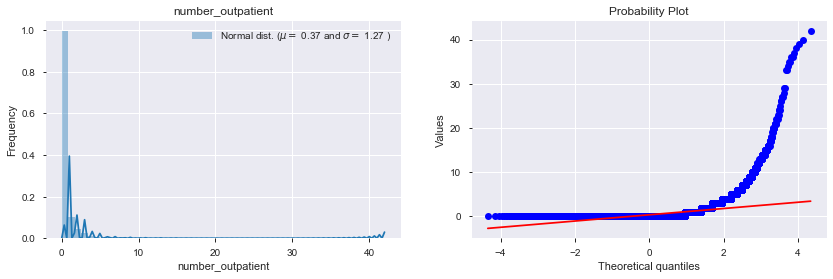

After Log Transformation

 mu = 0.17 and sigma = 0.43



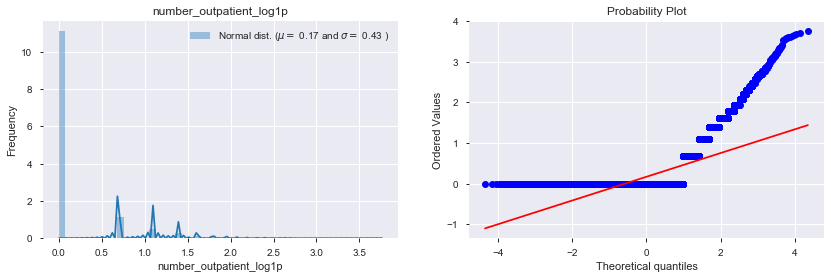

In [36]:
transform =['number_emergency','number_inpatient', 'number_outpatient']
Log_transform= ['number_emergency_log1p','number_inpatient_log1p', 'number_outpatient_log1p']

for i in range(0,3):
    print (" Title: %s" % transform[i])
    print (" Before Log Transformartion")
    fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(14, 4))

    sns.distplot(df[transform[i]], ax = ax1)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[transform[i]])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Plot the distribution
    ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    ax1.set_ylabel('Frequency')
    ax1.set_title(transform[i])

    #Get also the QQ-plot
    ax2 = plt.subplot(122)
    res = stats.probplot(df[transform[i]], plot=plt)
    ax2.set_ylabel('Values')
    plt.show()
    
    print( "After Log Transformation")
    
    fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(14,4))

    sns.distplot(df[Log_transform[i]], ax = ax1)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[Log_transform[i]])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Plot the distribution
    ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    ax1.set_ylabel('Frequency')
    ax1.set_title(Log_transform[i])

    #Get also the QQ-plot
    ax2 = plt.subplot(122)
    res = stats.probplot(df[Log_transform[i]], plot=plt)
    plt.show()
    



In [37]:
df_dummified.select_dtypes(include=['int64','float64']).columns.tolist()

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'med_dosage_change',
 'number_of_medicine']

In [38]:
#drop number_outpatient, number_emergency, number_inpatient, these columns were featured engineered into log
df_dummified = df_dummified.drop(['number_outpatient', 'number_emergency','number_inpatient'], axis = 1)



In [39]:
new_num_cols = df_dummified.select_dtypes(include=['int64','float64']).columns.tolist()


In [40]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [41]:
df_dummified[new_num_cols] = standardize(df_dummified[new_num_cols])
import scipy.stats as sp
df_dummified = df_dummified[(np.abs(sp.zscore(df_dummified[new_num_cols])) < 3).all(axis=1)]


In [42]:
import seaborn as sns
from matplotlib.colors import ListedColormap

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
#table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df_dummified.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

In [43]:
df_train_cleaned = df_dummified[df_dummified.dataset=='train']
df_test_cleaned = df_dummified[df_dummified.dataset=='test']

df_train_cleaned = df_train_cleaned.drop(columns='dataset')
df_test_cleaned = df_test_cleaned.drop(columns='dataset')

print(f'df_train_cleaned has shape {df_train_cleaned.shape}')
print(f'df_test_cleaned has shape {df_test_cleaned.shape}')


df_train_cleaned has shape (84929, 75)
df_test_cleaned has shape (9442, 75)


In [44]:
df_train_cleaned.to_csv('./whole_df_train_cleaned.csv', index=False)
df_test_cleaned.to_csv('./whole_df_test_cleaned.csv', index=False)



In [45]:
# encounter_frequency = pd.DataFrame(df_dummified.patient_nbr.value_counts())
# encounter_frequency = encounter_frequency.reset_index()
# encounter_frequency.rename(columns = {'index':'patient_nbr', 'patient_nbr':'encounter_frequency'}, inplace = True) 
# encounter_frequency.patient_nbr = encounter_frequency.patient_nbr.astype('object')
# encounter_frequency

In [46]:
df_dummified_unique = df_dummified.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df_dummified_unique.shape
#df_dummified_unique will drop all multiple encounter, only keep 1

(67064, 76)

In [47]:
# df_dummified_unique = pd.merge(df_dummified_unique, encounter_frequency, left_on='patient_nbr', right_on='patient_nbr')


In [48]:
df_unique_train_cleaned = df_dummified_unique[df_dummified_unique.dataset=='train']
df_unique_test_cleaned = df_dummified_unique[df_dummified_unique.dataset=='test']

df_unique_train_cleaned = df_unique_train_cleaned.drop(columns='dataset')
df_unique_test_cleaned = df_unique_test_cleaned.drop(columns='dataset')

print(f'df_unique_train_cleaned has shape {df_unique_train_cleaned.shape}')
print(f'df_unique_test_cleaned has shape {df_unique_test_cleaned.shape}')


df_unique_train_cleaned has shape (61763, 75)
df_unique_test_cleaned has shape (5301, 75)


In [49]:
df_unique_train_cleaned.to_csv('./df_unique_train_cleaned.csv', index=False)
df_unique_test_cleaned.to_csv('./df_unique_test_cleaned.csv', index=False)

